In [3]:
import csv
import pandas as pd
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np



In [4]:
def File_Cleaning_and_preprocessing(path):
    file=pd.read_csv(path)    
    #preprocessing the textual columns/features
    le=preprocessing.LabelEncoder()
    file.date=le.fit_transform(file.date)
    
    columns = list(file.columns)

    #Normalizing the features except 
    for i in columns[1:20]:
                mean, std = file[i].mean(), file[i].std()
                file.loc[:, i] = (file[i] - mean)/std
    file1 = file.values[:2000,:]
    file2 = file.values[2000:2500,:]
    return file1,file2,columns





In [5]:
TrainFile,TestFile,columns = File_Cleaning_and_preprocessing('C:/Users/Home/Downloads/kc_house_data.csv/kc_house_data.csv')
TrainFeatures = TrainFile[:,1:20]
TrainTarget = TrainFile[:,20]
TestFeatures = TestFile[:,1:20]

clf_BlackBoxModel = svm.SVC()
clf_BlackBoxModel.fit(TrainFeatures,TrainTarget)
prediction_of_BlackBoxModel = clf_BlackBoxModel.predict(TestFeatures)



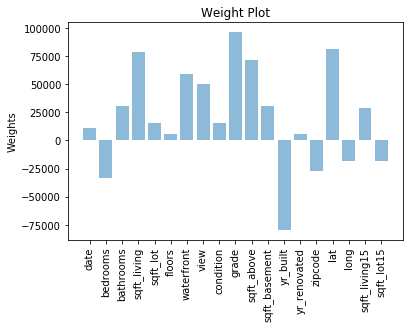

Surrogate Model: Linear Regression
R2 score: -1.14200623612
Root Mean Square error: 248570.9435752661


In [6]:
clf_LinearModel = linear_model.LinearRegression()
clf_LinearModel.fit(TrainFeatures,TrainTarget)
LinearModel_prediction = clf_LinearModel.predict(TestFeatures)

features = columns[1:20]
y_pos = np.arange(len(features))
weights = clf_LinearModel.coef_
 
plt.bar(y_pos, weights, align='center', alpha=0.5)

plt.xticks(y_pos, features , rotation ='vertical')
plt.ylabel('Weights')
plt.title('Weight Plot')
 
plt.show()

print("Surrogate Model: Linear Regression")
print("R2 score:",r2_score( prediction_of_BlackBoxModel, LinearModel_prediction))
rmse=sqrt(mean_squared_error(prediction_of_BlackBoxModel, LinearModel_prediction))
print("Root Mean Square error:", rmse)


In [7]:
clf_DecisionTree=tree.DecisionTreeRegressor()
clf_DecisionTree.fit(TrainFeatures,TrainTarget)
prediction_of_DecisionTree=clf_DecisionTree.predict(TestFeatures)

graph = Source(tree.export_graphviz(clf_DecisionTree, out_file=None 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

print("Surrogate Model: Decision Tree")
print("R2 score:",r2_score(prediction_of_BlackBoxModel,prediction_of_DecisionTree))
rmse=sqrt(mean_squared_error(prediction_of_BlackBoxModel,prediction_of_DecisionTree))
print("Root mean square error:",rmse)

Surrogate Model: Decision Tree
R2 score: -2.08441158275
Root mean square error: 298281.3899200384
